In [2]:
import pandas as pd

df = pd.read_csv('top5.csv')

In [3]:
df

,title,rating,year_of_release,director,actors,runtime,url
0,All Quiet on the Western Front,8.1,1930,Lewis Milestone,Lew Ayres; Louis Wolheim; John Wray; Arnold Lucy,152,/title/tt0020629/?ref_=adv_li_tt
1,Der blaue Engel,7.7,1930,Josef von Sternberg,Emil Jannings; Marlene Dietrich; Kurt Gerron; ...,104,/title/tt0020697/?ref_=adv_li_tt
2,Animal Crackers,7.4,1930,Victor Heerman,Groucho Marx; Harpo Marx; Chico Marx; The Marx...,97,/title/tt0020640/?ref_=adv_li_tt
3,Hell's Angels,7.3,1930,"Howard Hughes, Edmund Goulding, James Whale",Ben Lyon; James Hall; Jean Harlow; John Darrow,127,/title/tt0020960/?ref_=adv_li_tt
4,Zemlya,7.2,1930,Aleksandr Dovzhenko,Stepan Shkurat; Semyon Svashenko; Yuliya Solnt...,75,/title/tt0021571/?ref_=adv_li_tt
...,...,...,...,...,...,...,...
445,Little Baby,8.5,2019,Shekhar S. Jha,Priyanshu Chatterjee; Gulnaz Siganporia; Shiva...,105,/title/tt8569206/?ref_=adv_li_tt
446,Kaithi,8.5,2019,Lokesh Kanagaraj,Karthi; Narain; Arjun Das; George Maryan,145,/title/tt9900782/?ref_=adv_li_tt
447,Kumbalangi Nights,8.5,2019,Madhu C. Narayanan,Shane Nigam; Soubin Shahir; Fahadh Faasil; Sre...,135,/title/tt8413338/?ref_=adv_li_tt
448,Gisaengchung,8.5,2019,Bong Joon Ho,Song Kang-ho; Lee Sun-kyun; Cho Yeo-jeong; Cho...,132,/title/tt6751668/?ref_=adv_li_tt


In [10]:
result = pd.DataFrame(columns=['year', 'avg_rating'])

for year in df.year_of_release.unique().tolist():
    result = pd.concat([result, pd.DataFrame({'year': year, 'avg_rating': df.rating[df.year_of_release == year].mean()
    }, index=[0])])

In [12]:
import matplotlib.pyplot as plt

<BarContainer object of 90 artists>

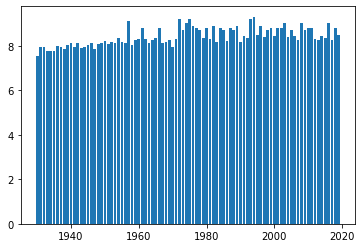

In [13]:
plt.bar(result.year, result.avg_rating)

In [22]:
actors = df.actors.apply(lambda x: x.split('; '))

In [34]:
actors = sum(actors, [])

In [47]:
from collections import Counter
d = Counter(actors)

In [51]:
app = pd.DataFrame.from_dict(d, orient='index').reset_index()

In [58]:
app = app.rename(columns={'index': 'actor', 0: 'appearance'})

In [64]:
top50 = app.sort_values(by='appearance', ascending=False).head(50)

<BarContainer object of 50 artists>

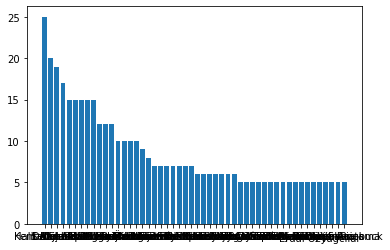

In [65]:
plt.bar(top50.actor, top50.appearance)